In [1]:
!pip install pandas textblob matplotlib seaborn


In [2]:
import pandas as pd

# Sample dataset of movie reviews
url = "https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv"
df = pd.read_csv(url)

df.head()


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
df = df[['tweet', 'label']]
df = df.dropna()
df.head()

,tweet,label
0,@user when a father is dysfunctional and is s...,0
1,@user @user thanks for #lyft credit i can't us...,0
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,0
4,factsguide: society now #motivation,0


In [6]:
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['polarity'] = df['tweet'].apply(get_sentiment)
df['predicted_sentiment'] = df['polarity'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

df.head()

,tweet,label,polarity,predicted_sentiment
0,@user when a father is dysfunctional and is s...,0,-0.500000,negative
1,@user @user thanks for #lyft credit i can't us...,0,0.200000,positive
2,bihday your majesty,0,0.000000,neutral
3,#model i love u take with u all the time in ...,0,0.976562,positive
4,factsguide: society now #motivation,0,0.000000,neutral


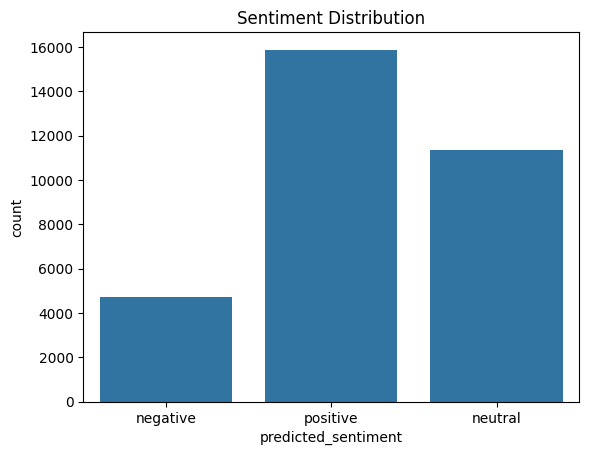

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='predicted_sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()


In [8]:
print("- The majority of reviews are", df['predicted_sentiment'].value_counts().idxmax())
print("- Sentiment analysis can help identify customer opinions automatically.")
print("- Polarity scores range from -1 (negative) to 1 (positive) for each review.")


- The majority of reviews are positive
- Sentiment analysis can help identify customer opinions automatically.
- Polarity scores range from -1 (negative) to 1 (positive) for each review.
